# Week 1: Day 1 AM - Machine Learning Landscape

# A. Setup

In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

# B. MNIST

For today task, we will be using a dataset called **MNIST**.

* MNIST is a dataset that contains 70,000 images of handwritten digits.
* The classes/labels are numbers between **0 and 9**.
* Each of image is contains **28 * 28 pixels**.
* Each of image is **black-and-white** image where each pixel contains number between 0-255.
* Sample of dataset : [MNIST sample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png).
* For more details, please visit : [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) or [Yann Le Cun's Website](/http://yann.lecun.com/exdb/mnist/).

---
## Fetch MNIST

To get this dataset, we can use package/modul Scikit-Learn.

In [2]:
%%time
# Fetch MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print('Keys: ', mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
CPU times: user 25 s, sys: 408 ms, total: 25.4 s
Wall time: 31.8 s


In [3]:
# Get All Data and All Labels

X, y = mnist["data"], mnist["target"]

print('Total Data   : ', X.shape)
print('Total Labels : ', y.shape)

Total Data   :  (70000, 784)
Total Labels :  (70000,)


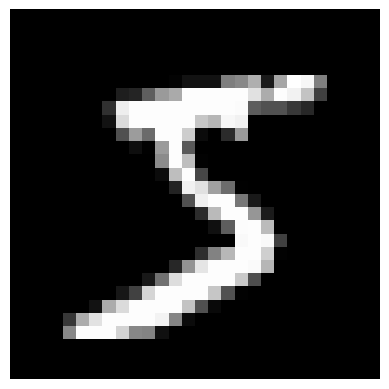

In [4]:
# Visualization of First Data

first_image = X[0]
plt.imshow(first_image.reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

In [5]:
# Display Value in First Data

print('First Data - Value')
print(X[0])
print('First Data - Type  : ', type(X[0]))
print('First Data - Shape : ', X[0].shape)

First Data - Value
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   

In [6]:
# Display Target Class for First Data

print('First Data - Target      : ', y[0])
print('First Data - Target Type : ', type(y[0]))

First Data - Target      :  5
First Data - Target Type :  <class 'str'>


As you can see, the target class is in `string` type. We will convert it to numeric for better process.

In [7]:
# Convert Str to Int for Target Labels

y = y.astype(np.uint8)

---
## Explore Dataset

Let's explore a bit more about our dataset.

In [8]:
# Function for Visualize A Specific Image (One Image Only)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'gray')
    plt.axis("off")

In [9]:
# Function for Visualize A Group of Images

def plot_digits(instances, images_per_row=10):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gray')
    plt.axis("off")

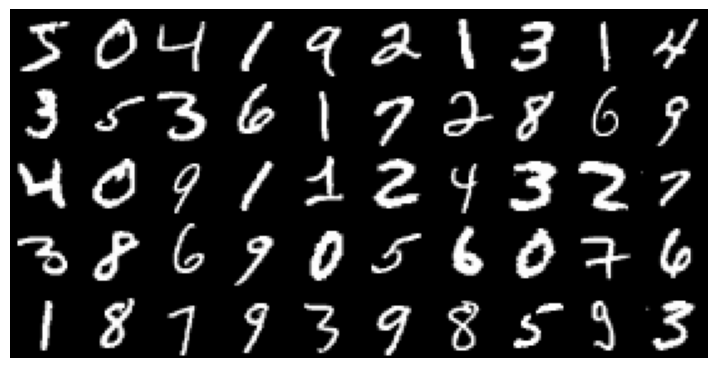

In [10]:
# Visualization of the First 50 Images

plt.figure(figsize=(9,9))
example_images = X[:50]
plot_digits(example_images, images_per_row=10)
plt.show()

In [11]:
# Display the First 10 Target Labels

y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

---
## Splitting Data

Before we create a model, make sure that at least two types of data are available, namely train data and test data.

* Data train is any kind of data that aims to create a model. This data should be as clean as possible. Therefore, a process called data cleaning will only occur in this data, such as handling missing values, outliers, handling cardinality, features scaling, etc.
* Test data is any kind of data that are not included in the training process. The purpose of this data is to check the performance of the newly created model. The better the model, the more resistant it is to all kinds of data that it has never seen.

Notes of MNIST Dataset :

* There are many ways to get the MNIST dataset.
* You can download directly from Kaggle, [Yan Le Cun's website](https://http://yann.lecun.com/exdb/mnist/), Scikit-Learn module, etc.
* As previously mentioned, this dataset should have been divided into two, training data and testing data.
* *However, if you get it using Scikit-Learn module, you will have to divide this dataset into train data and test data manually.*

In [12]:
# Split MNIST into Train Data and Test Data Manually

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print('Size Train-Set : ', X_train.shape)
print('Size Test-Set  : ', X_test.shape)

Size Train-Set :  (60000, 784)
Size Test-Set  :  (10000, 784)


# C. Multiclass Classification

## Logistic Regression

In [13]:
# Create A Model with Logistic Regression

%%time
from sklearn.linear_model import LogisticRegression

# Model Initialization
model = LogisticRegression()

# Model Training
model.fit(X_train, y_train)

CPU times: user 1min 7s, sys: 5.88 s, total: 1min 13s
Wall time: 43.2 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Result Logistic Regression :  [5]


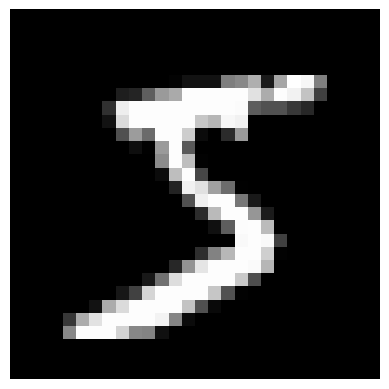

In [14]:
# Predict A Data
result_model = model.predict([first_image])

# Display Result of Prediction
plot_digit(first_image)
print('Result Logistic Regression : ', result_model)

In [15]:
# Calculate Accrucay on train-set and test-set
from sklearn.metrics import accuracy_score

## Get Predictions from train-set
y_pred_train = model.predict(X_train)

## Get Predictions from test-set
y_pred_test = model.predict(X_test)

print('Accuracy Score - Train Set : ', accuracy_score(y_train, y_pred_train))
print('Accuracy Score - Test Set  : ', accuracy_score(y_test, y_pred_test))

Accuracy Score - Train Set :  0.9339166666666666
Accuracy Score - Test Set  :  0.9255
